In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
save_plot = 'visualization/temp/'

In [3]:
f_combined = pd.read_csv('f_combined.csv')
f_combined.head()

,tf_idf_c,Head_Body_Sim,Head_compound,Head_neg,Head_neu,Head_pos,Body_compound,Body_neg,Body_neu,Body_pos,...,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,i_me_myself,punct,target,dataset
0,0.118339,0.804282,-0.8238,0.580,0.304,0.116,-0.119276,0.117241,0.806000,0.076724,...,13.34,11.6,7.75,107.0,8.285714,16.79,3.0,51.0,REAL,Dataset - 1
1,0.006971,0.971542,-0.4215,0.201,0.714,0.084,0.447000,0.047333,0.826000,0.126667,...,12.32,24.7,8.67,48.0,21.000000,27.29,0.0,20.0,FAKE,Dataset - 1
2,0.073704,0.968892,0.0000,0.000,1.000,0.000,0.045808,0.044583,0.685500,0.269833,...,11.50,16.9,8.41,57.0,16.250000,22.56,0.0,28.0,FAKE,Dataset - 1
3,0.260532,0.914280,0.0000,0.000,1.000,0.000,-0.030662,0.097875,0.748500,0.153750,...,13.87,15.2,8.62,45.0,15.750000,20.97,0.0,17.0,FAKE,Dataset - 1
4,0.294392,0.930432,-0.5994,0.438,0.562,0.000,-0.159617,0.121278,0.807167,0.071556,...,13.28,11.7,9.09,81.0,8.571429,20.26,1.0,34.0,FAKE,Dataset - 1


## LD

In [ ]:
d3_ld.head()

In [ ]:
sns.distplot(d3_ld[d3_ld['target'] == 1]['Lexical diversity'], bins = 10, kde = True)

In [ ]:
sns.distplot(d3_ld[d3_ld['target'] == 0]['Lexical diversity'], bins = 10, kde = True)

In [ ]:
sns.barplot(x = 'target', y = 'Lexical diversity', data= d3_ld, )

In [ ]:
d3_f.columns

In [4]:
readings = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
        'coleman_liau_index', 'automated_readability_index', 
        'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula',
        'gunning_fog', 'i_me_myself', 'punct']
sentiments = ['Head_compound', 'Head_neg', 'Head_neu',
              'Head_pos', 'Body_compound', 'Body_neg', 'Body_neu', 'Body_pos']
# head body similarity


## Readings


In [6]:
for i,j in enumerate(f_combined['dataset'].unique()):
    print(i,j)

0 Dataset - 1
1 Dataset - 2
2 Dataset - 3


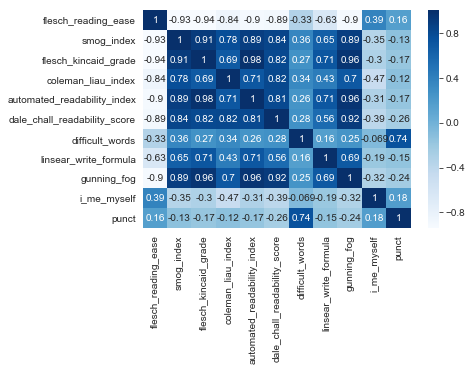

In [9]:
    sns.heatmap(f_combined[(f_combined['dataset']=='Dataset - 1') & (f_combined['target'] == 'FAKE')]\
                [readings].corr(method='spearman'), cmap='Blues', annot=True)

Wall time: 7.91 s


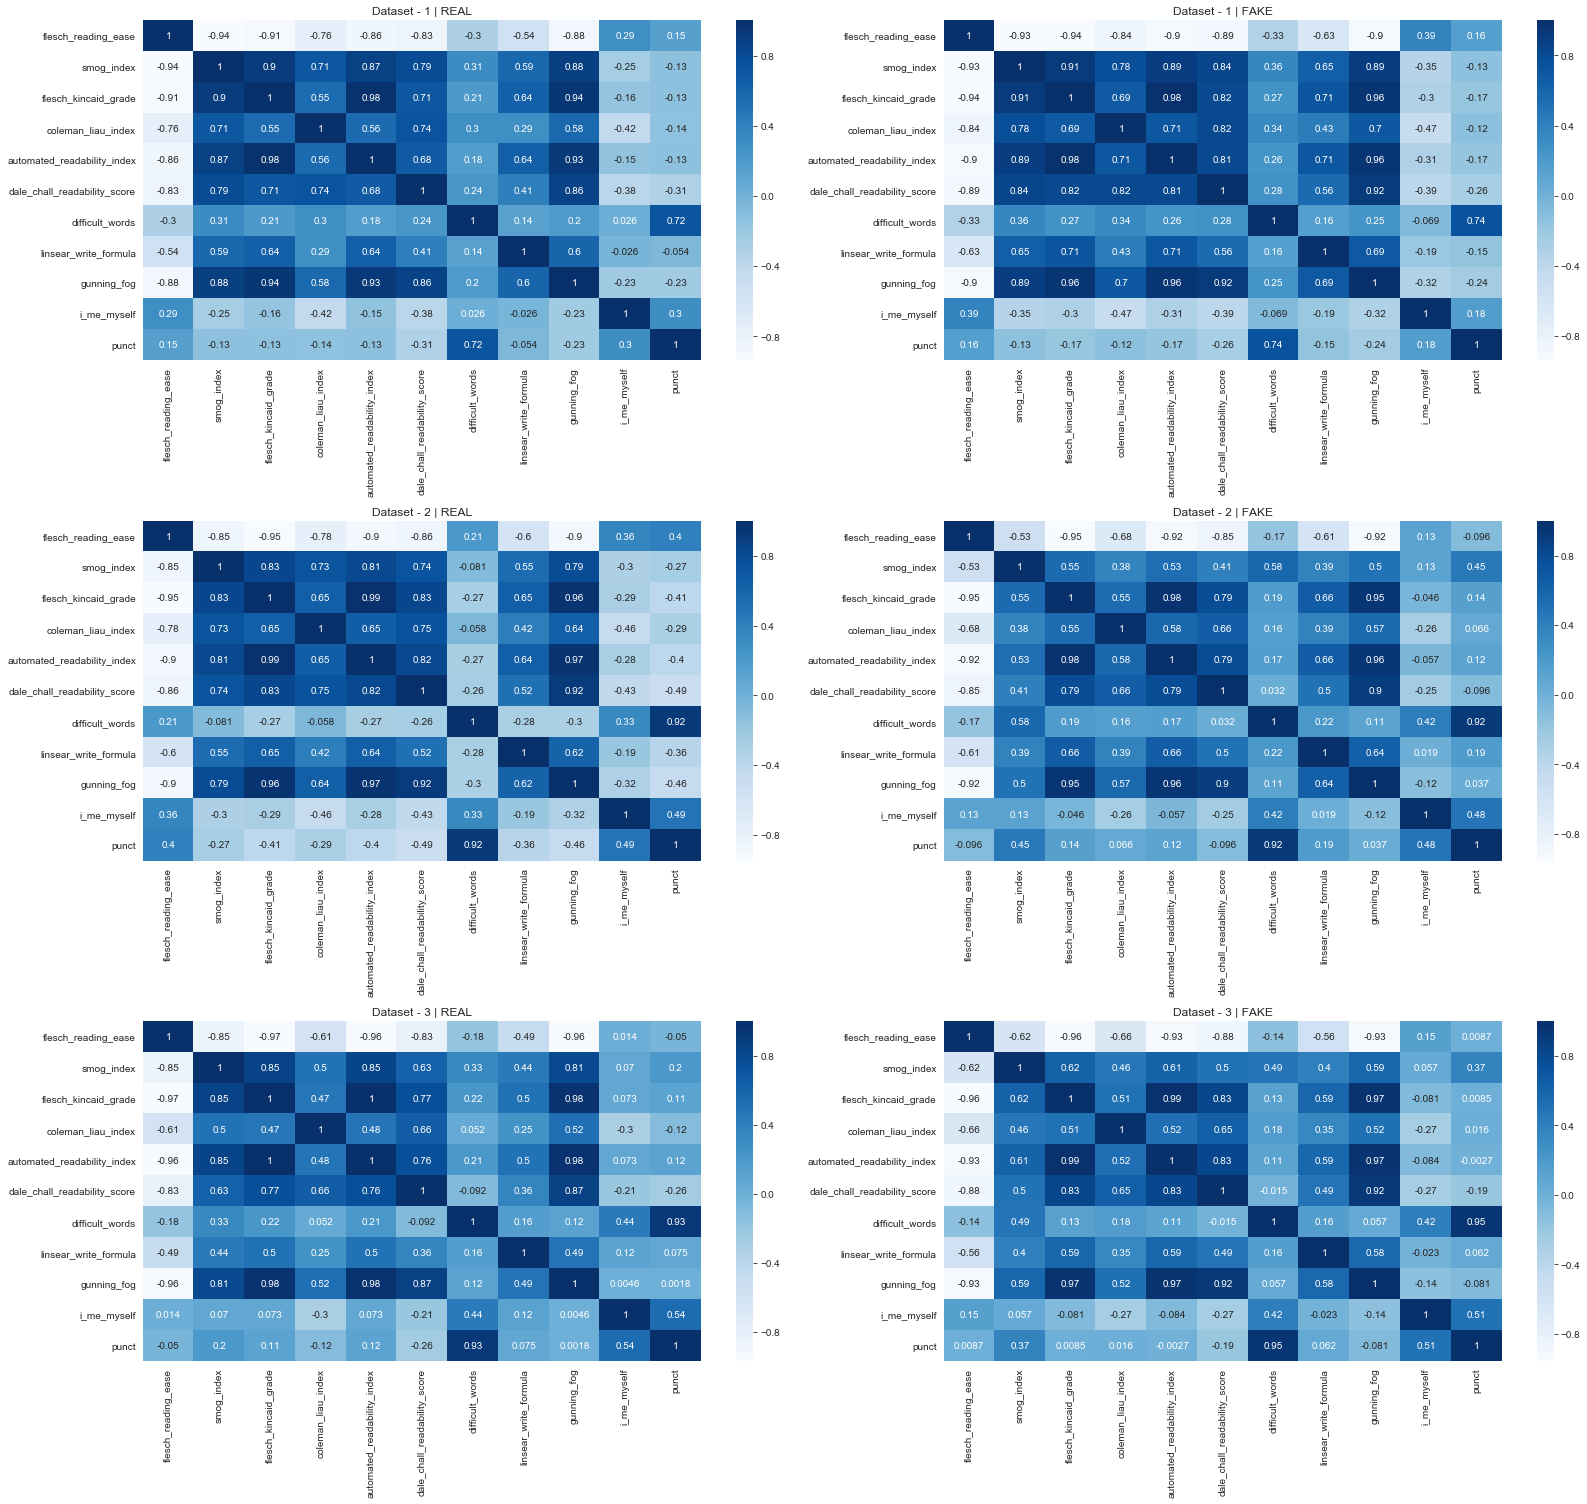

In [21]:
%%time
fig, axs = plt.subplots(nrows = 3,ncols=2,figsize = (23,7*3))
for i,j in enumerate(f_combined['dataset'].unique()):
    sns.heatmap(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')]\
                [readings].corr(method='spearman'), cmap='Blues', annot=True,
                ax = axs[i][0])
    axs[i][0].title.set_text(j+' | REAL')
    sns.heatmap(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')]\
                [readings].corr(method='spearman'), cmap='Blues', annot=True,
                ax = axs[i][1])
    axs[i][1].title.set_text(j+' | FAKE')


plt.tight_layout()

In [22]:
fig.savefig(save_plot+'1_feature_corr',dpi = 300)

Wall time: 964 ms


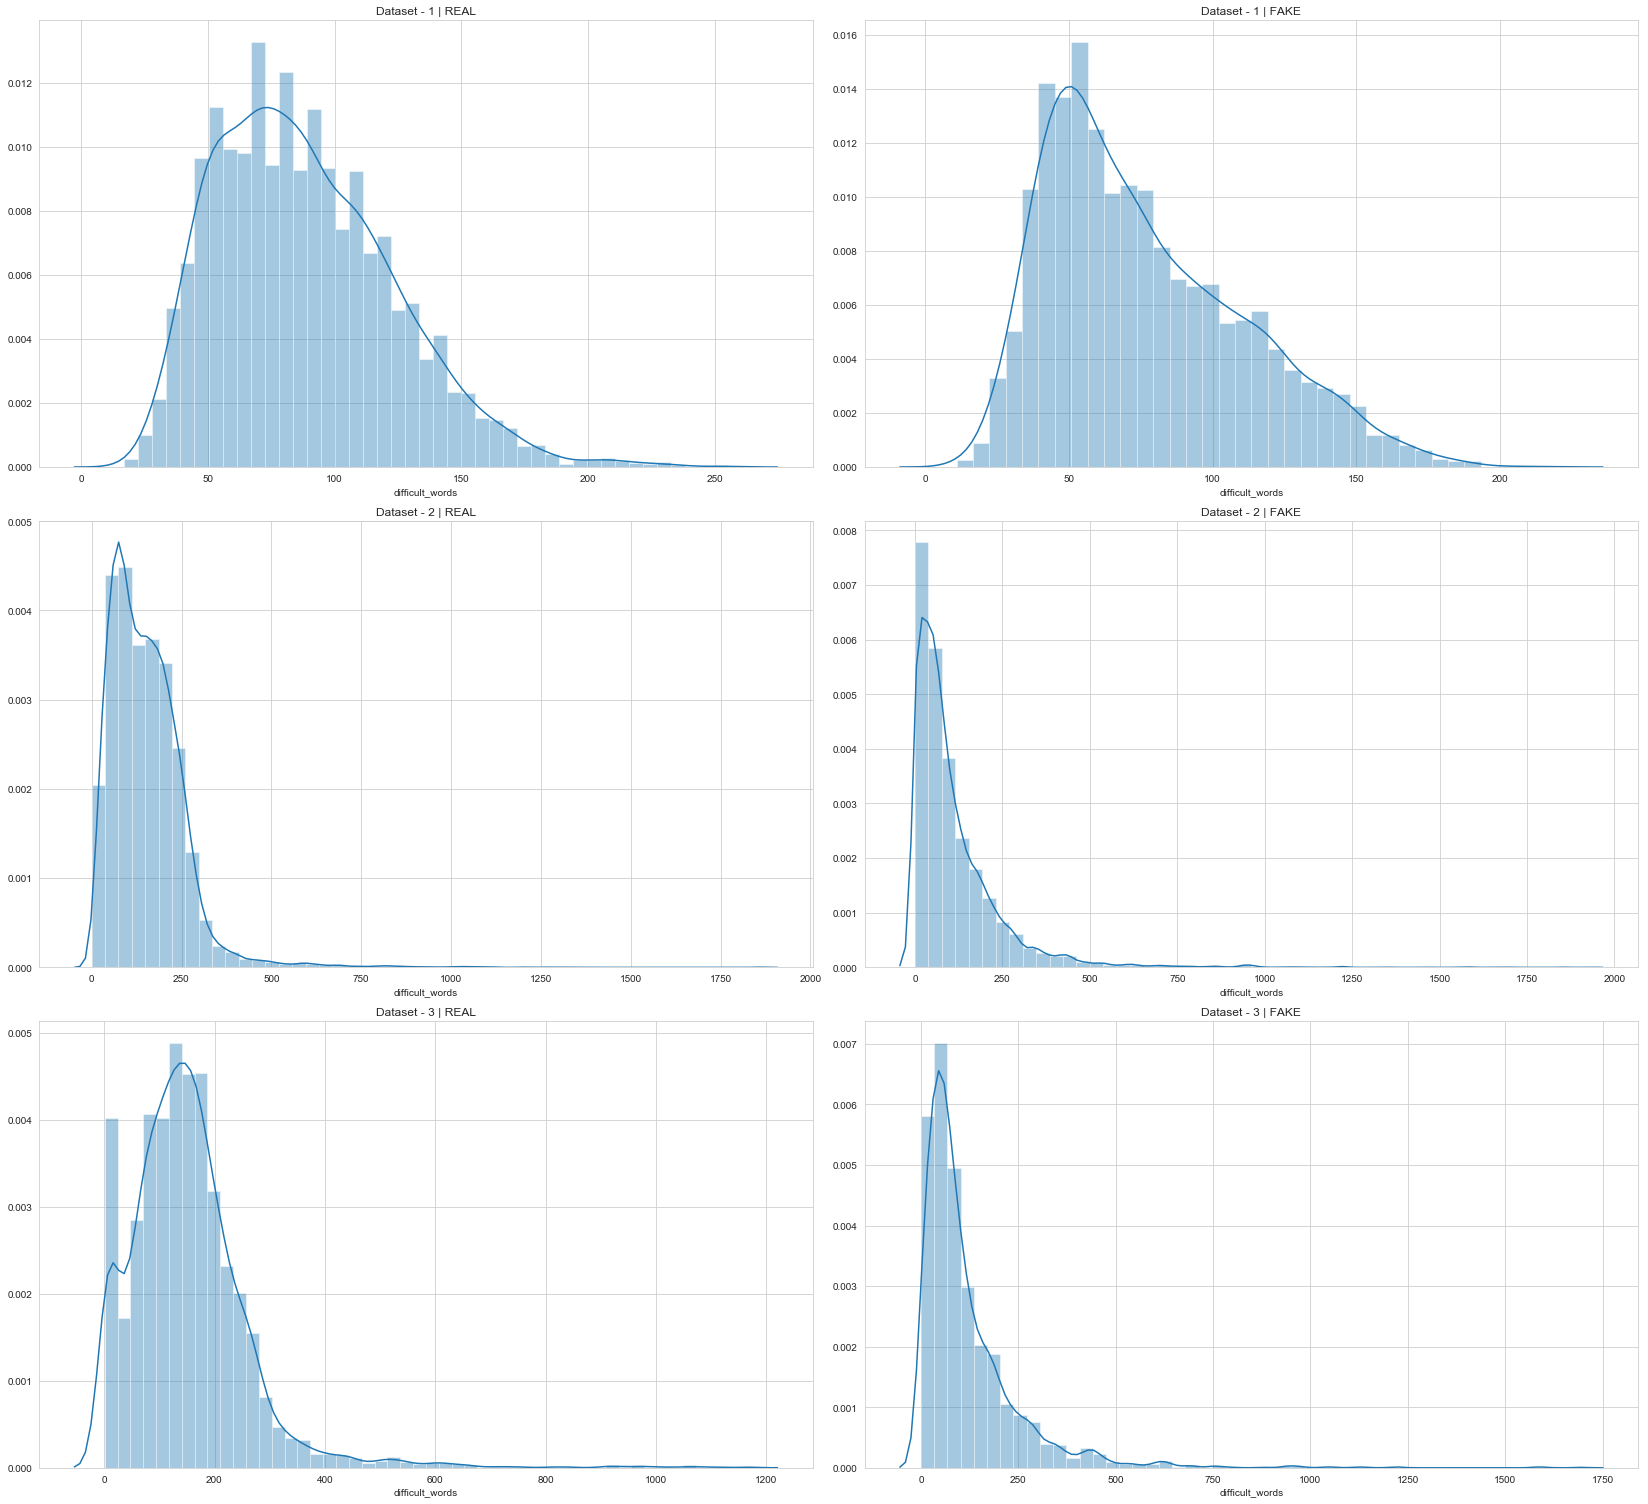

In [23]:
%%time
fig, axs = plt.subplots(nrows = 3,ncols=2,figsize = (23,7*3))
for i,j in enumerate(f_combined['dataset'].unique()):
    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')]\
                ['difficult_words'],ax = axs[i][0])
    axs[i][0].title.set_text(j+' | REAL')
    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')]\
                ['difficult_words'], ax = axs[i][1])
    axs[i][1].title.set_text(j+' | FAKE')


plt.tight_layout()

'''

fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(d3_f[d3_f['target']==0]['difficult_words'], kde = False, bins = 20, 
             ax = axs[0])
sns.distplot(d3_f[d3_f['target']==1]['difficult_words'], kde = False, bins = 20, 
             ax = axs[1])''';


In [24]:
#fig.savefig(save_plot+'2_difficult_words',dpi = 300)

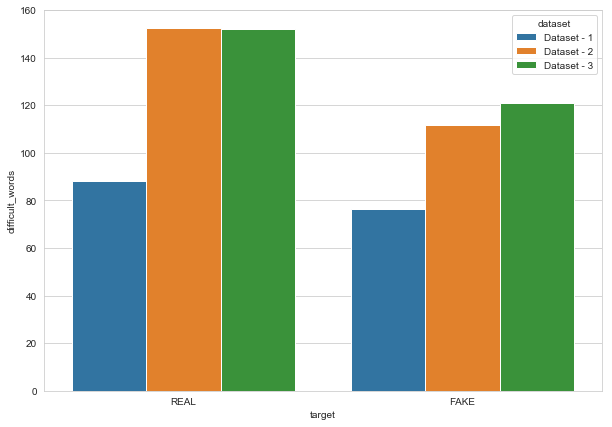

In [25]:
fig, axs = plt.subplots(figsize = (10,7))
sns.barplot(x = 'target', y = 'difficult_words', data = f_combined, hue = 'dataset', ci = None, ax=axs)

In [26]:
#fig.savefig(save_plot+'3_difficults_words_comb',dpi = 300)

In [ ]:
readings

In [ ]:
for i,j in enumerate(f_combined['dataset'].unique()):
    print(i,j)

Wall time: 3.39 s


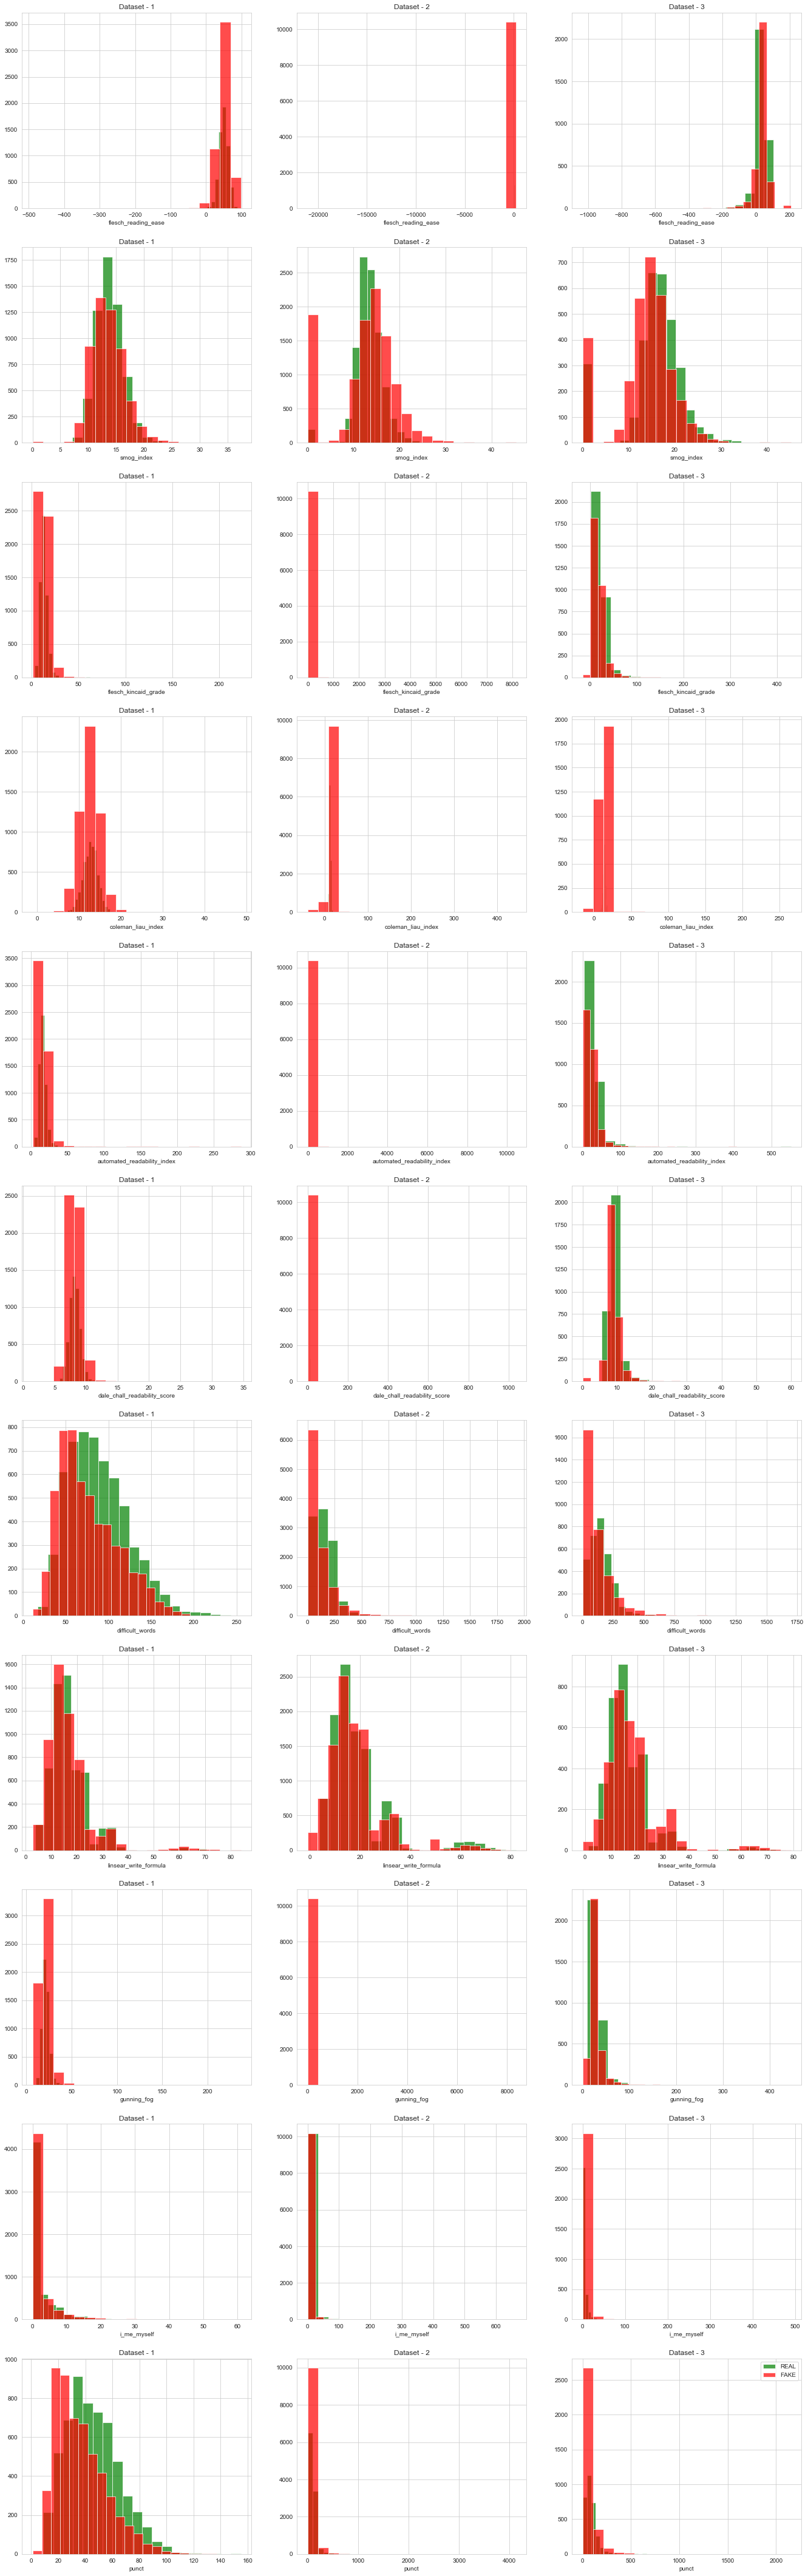

In [27]:
%%time
fig, axs = plt.subplots(nrows = len(readings), ncols=3,figsize = (23,7*len(readings)))
for k,f in enumerate(readings):
    for i,j in enumerate(f_combined['dataset'].unique()):
        sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')][f]
                     , kde = False, bins = 20,
                     hist_kws={'alpha':.7},label = 'REAL',color='green',ax = axs[k][i])
        axs[k][i].title.set_text(j)
        sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')][f]
                     , kde = False, bins = 20,
                     hist_kws={'alpha':.7},label = 'FAKE',color='red',ax = axs[k][i])

plt.legend()

In [28]:
#fig.savefig(save_plot+'4_reading_features',dpi = 300)

## Sentiments

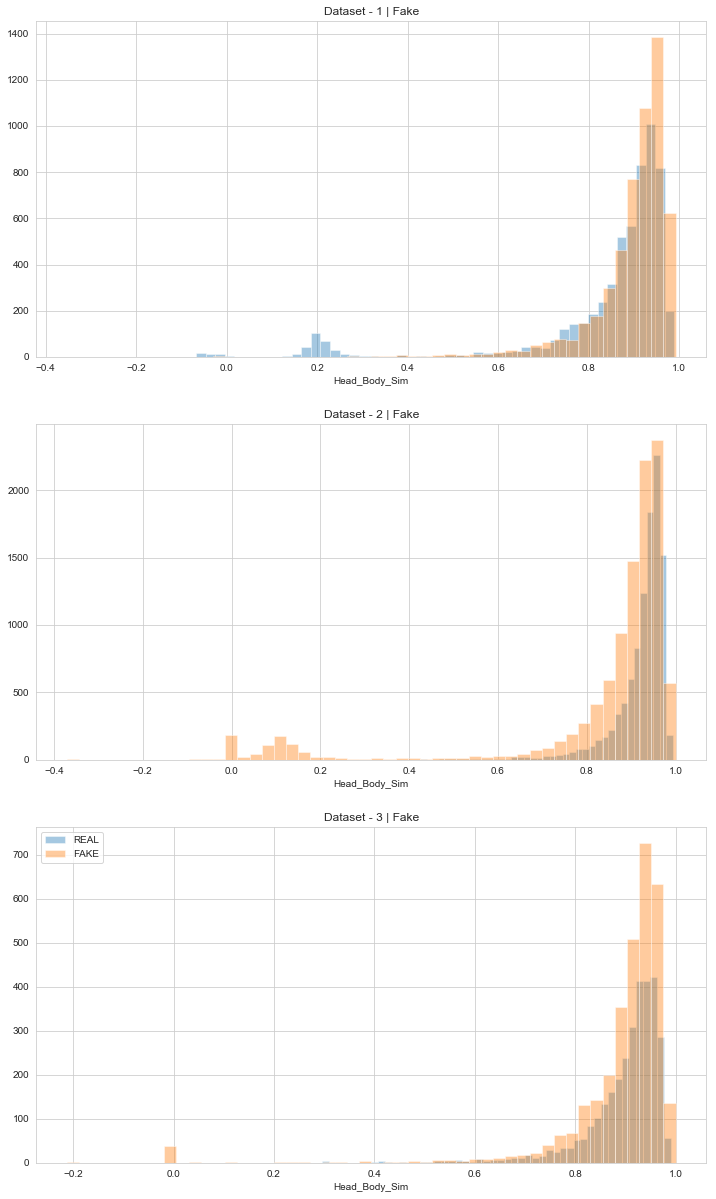

In [29]:

fig, axs = plt.subplots(nrows = 3,figsize = (12,7*3))

for i,j in enumerate(f_combined['dataset'].unique()):

    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')]['Head_Body_Sim'],
                 kde = False, ax = axs[i], label = 'REAL')
    axs[i].title.set_text(j+' | REAL')
    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')]['Head_Body_Sim'],
                 kde = False, ax = axs[i], label = 'FAKE')
    axs[i].title.set_text(j+' | Fake')

plt.legend()
    
    

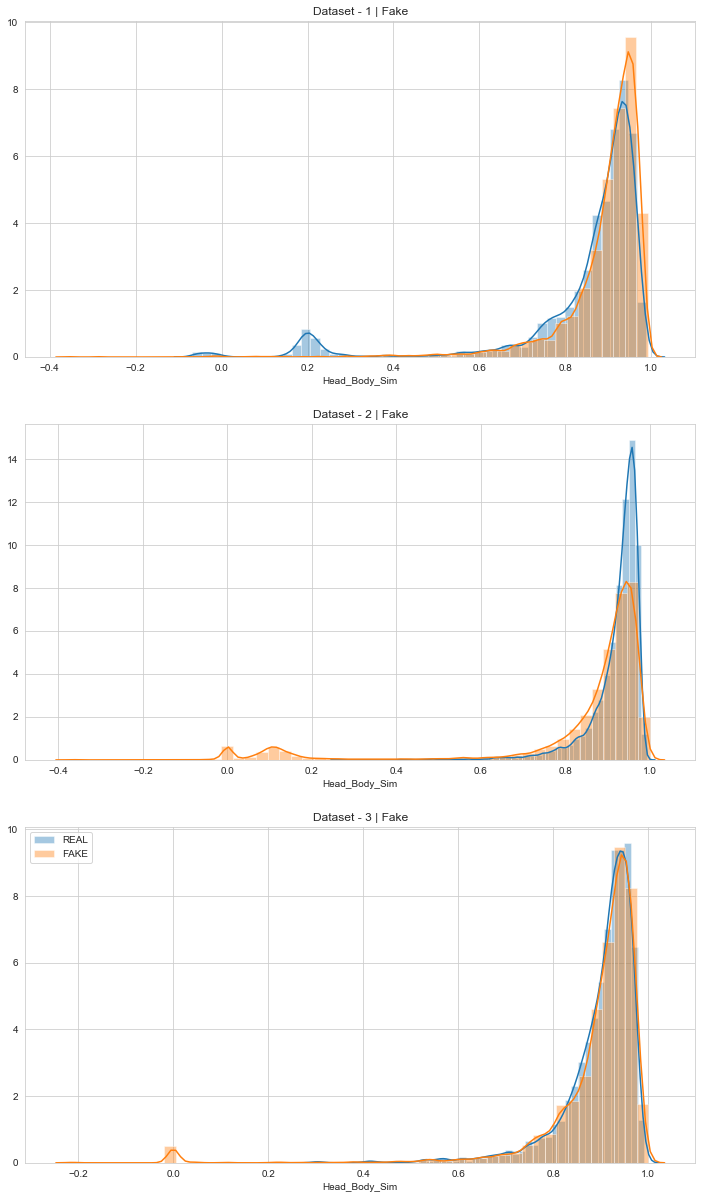

In [9]:
fig, axs = plt.subplots(nrows = 3,figsize = (12,7*3))

for i,j in enumerate(f_combined['dataset'].unique()):

    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')]['Head_Body_Sim'],
                 kde = True, ax = axs[i], label = 'REAL')
    axs[i].title.set_text(j+' | REAL')
    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')]['Head_Body_Sim'],
                 kde = True, ax = axs[i], label = 'FAKE')
    axs[i].title.set_text(j+' | Fake')

plt.legend()

In [30]:
#fig.savefig(save_plot+'5_head_body_sim',dpi = 300)

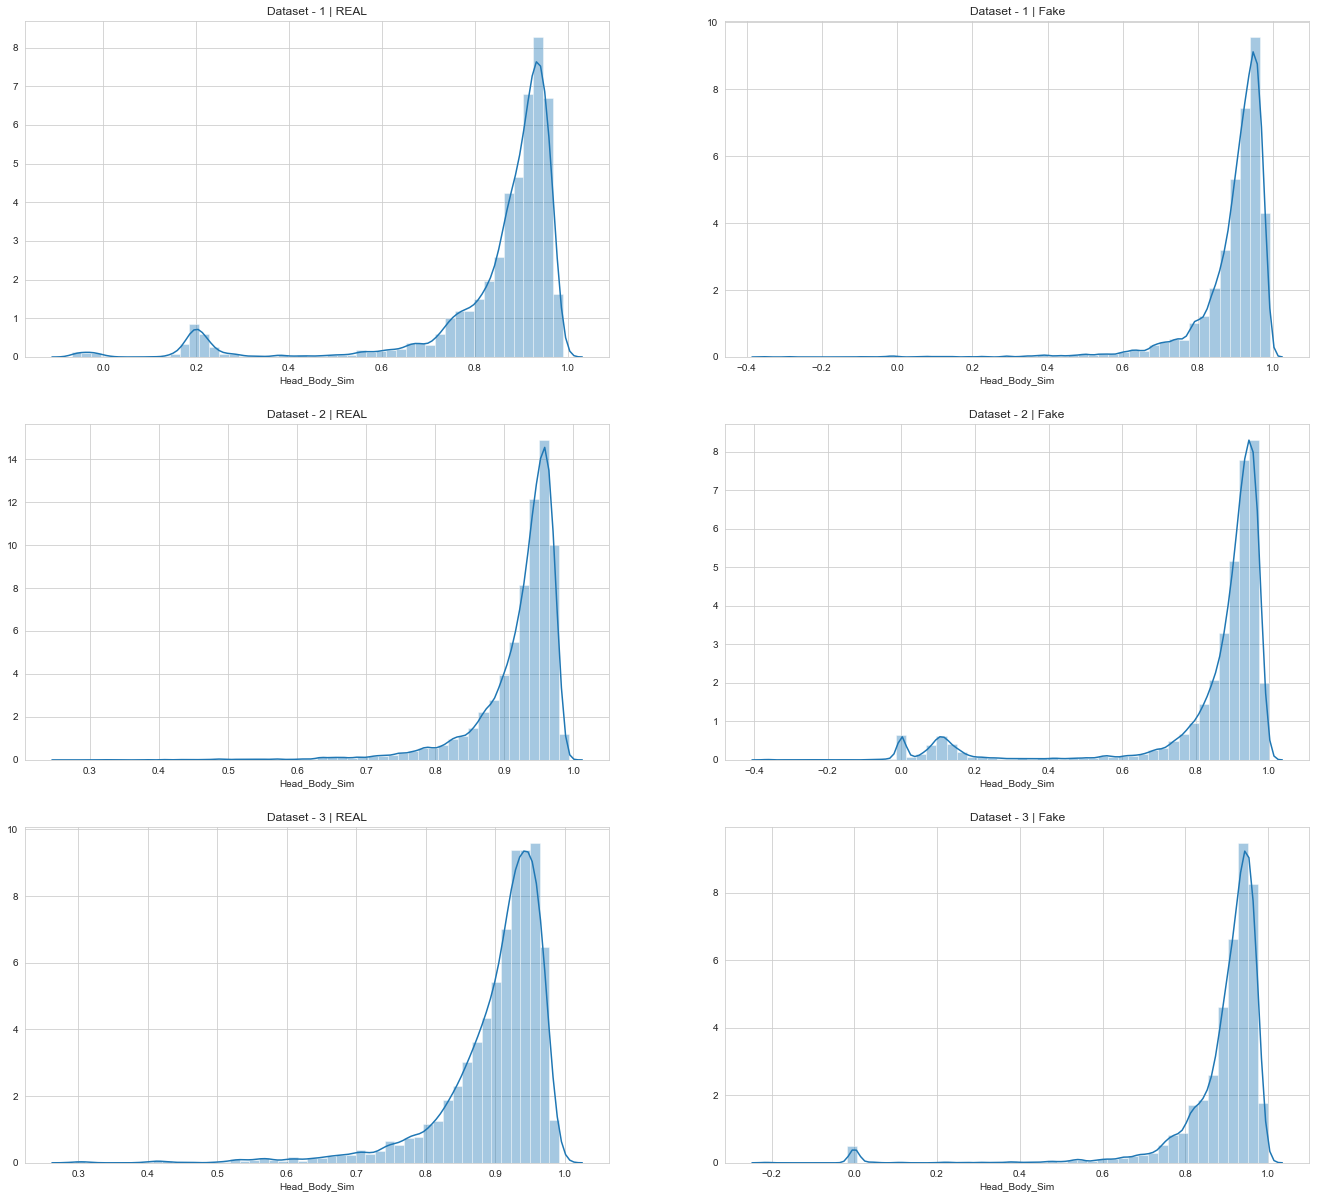

In [31]:
fig, axs = plt.subplots(nrows = 3,ncols=2,figsize = (23,7*3))
for i,j in enumerate(f_combined['dataset'].unique()):
    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')]['Head_Body_Sim'],
                 kde = True, ax = axs[i][0])
    axs[i][0].title.set_text(j+' | REAL')
    sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')]['Head_Body_Sim'],
                 kde = True, ax = axs[i][1])
    axs[i][1].title.set_text(j+' | Fake')

In [32]:
#fig.savefig(save_plot+'5a_head_body_sim',dpi = 300)

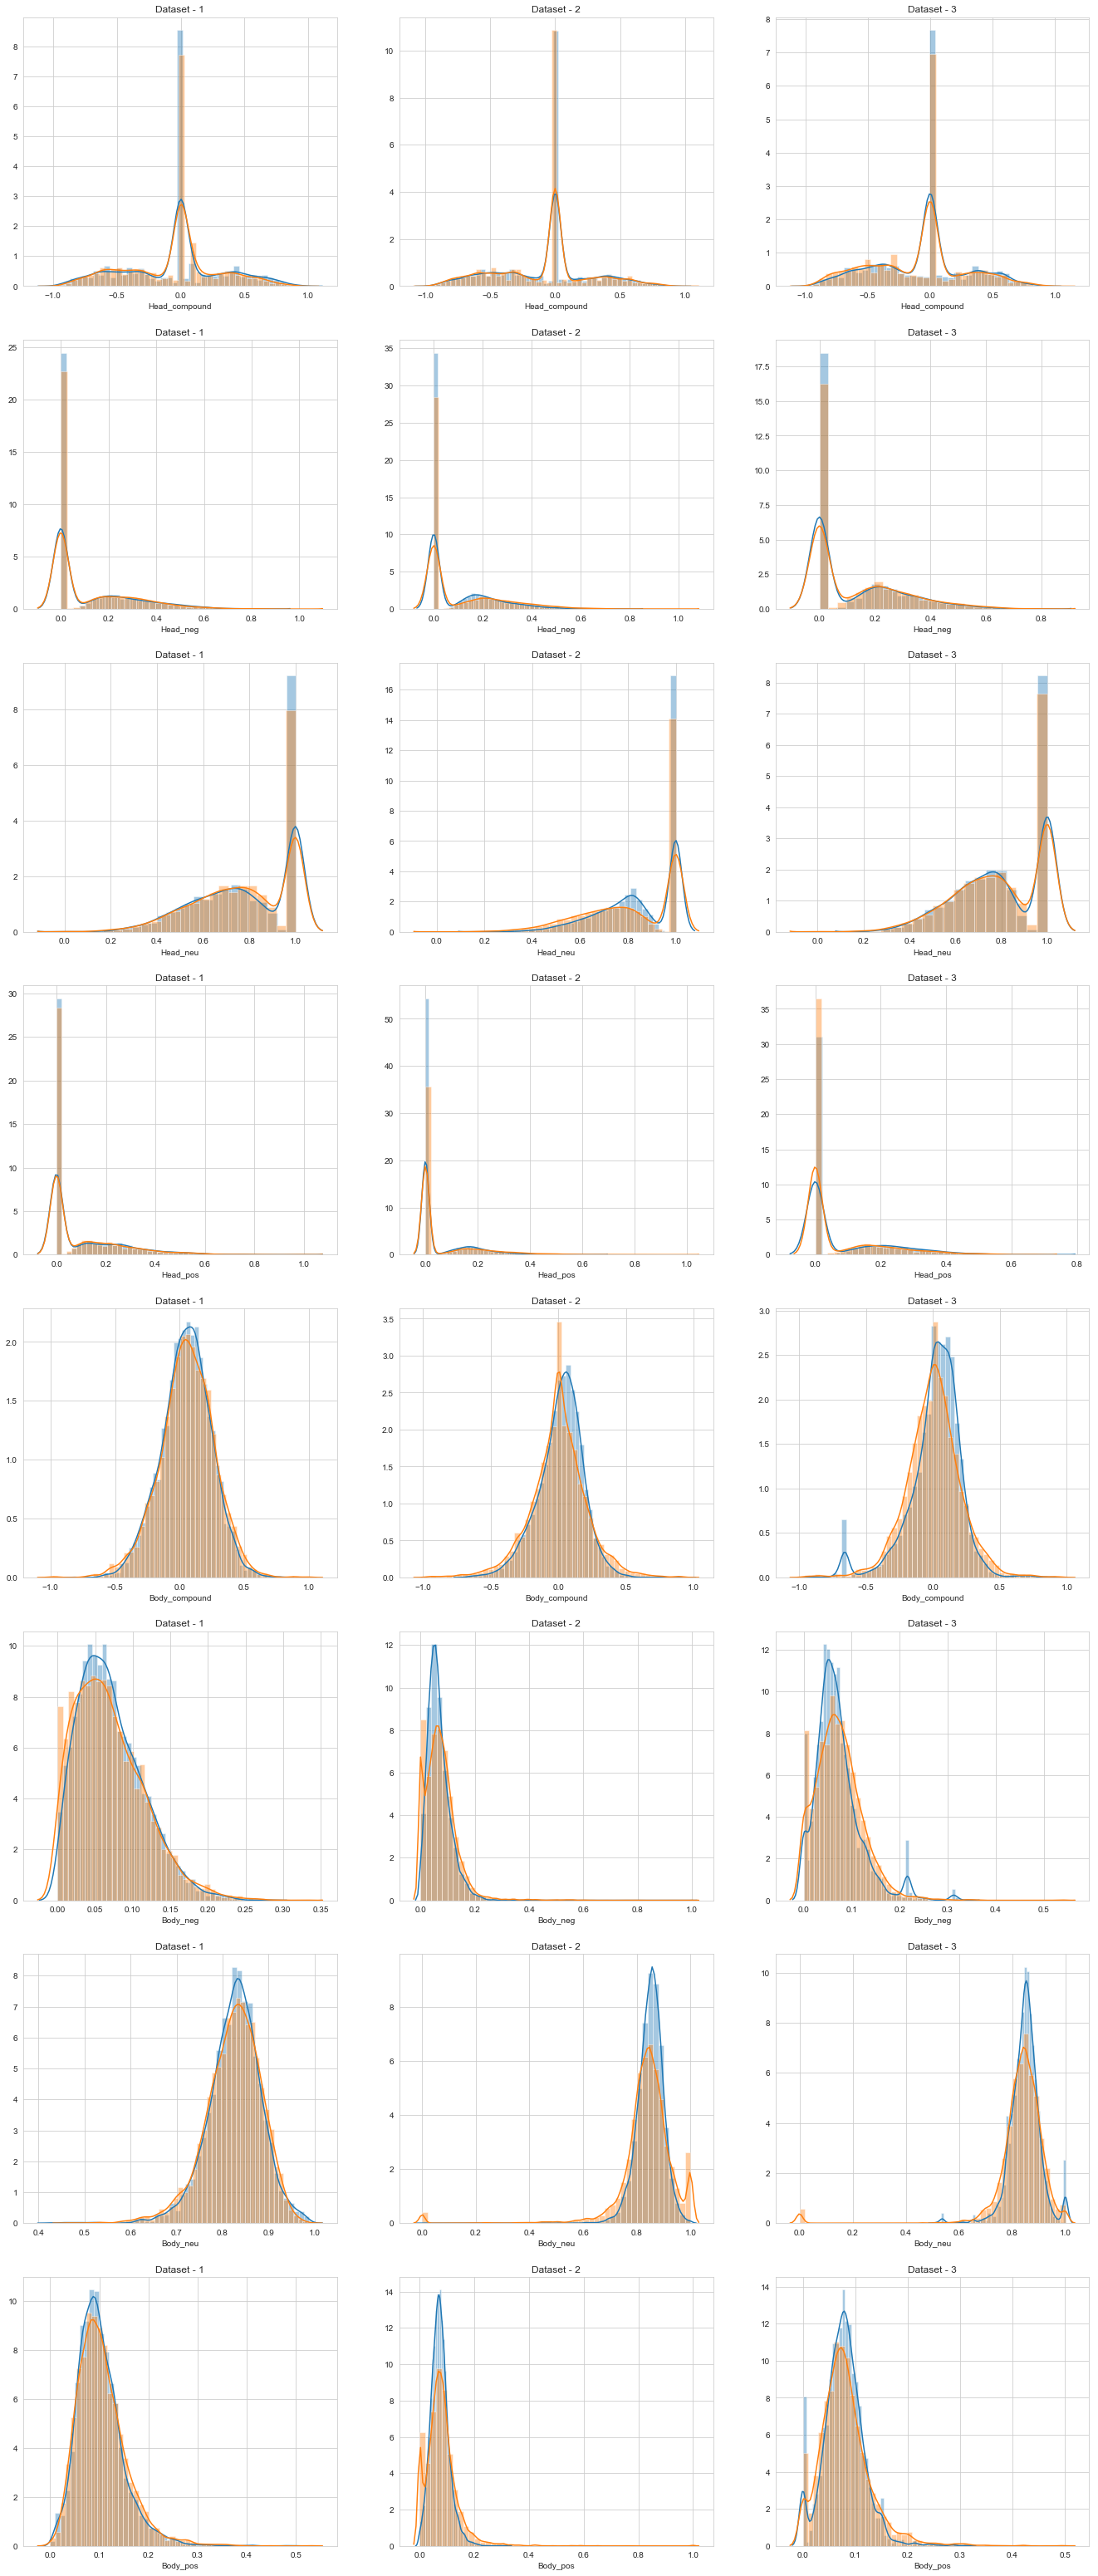

In [33]:
fig, axs = plt.subplots(nrows = len(sentiments) ,ncols=3,figsize = (23,7*len(sentiments)))
for k,s in enumerate(sentiments):
    for i,j in enumerate(f_combined['dataset'].unique()):
        sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'REAL')][s],
                     kde = True, ax = axs[k][i])
        axs[k][i].title.set_text(j)
        sns.distplot(f_combined[(f_combined['dataset']==j) & (f_combined['target'] == 'FAKE')][s],
                     kde = True, ax = axs[k][i])

In [34]:
#fig.savefig(save_plot+'6_head_body_senti',dpi = 300)

## Count features

In [35]:
cf_columns = ['count_of_Headline_unigram', 'count_of_unique_Headline_unigram', 
              'ratio_of_unique_Headline_unigram', 'count_of_Headline_bigram', 
              'count_of_unique_Headline_bigram', 'ratio_of_unique_Headline_bigram', 
              'count_of_Headline_trigram', 'count_of_unique_Headline_trigram', 
              'ratio_of_unique_Headline_trigram', 'count_of_articleBody_unigram', 
              'count_of_unique_articleBody_unigram', 'ratio_of_unique_articleBody_unigram', 
              'count_of_articleBody_bigram', 'count_of_unique_articleBody_bigram', 
              'ratio_of_unique_articleBody_bigram', 'count_of_articleBody_trigram', 
              'count_of_unique_articleBody_trigram', 'ratio_of_unique_articleBody_trigram', 
              'count_of_Headline_unigram_in_articleBody', 
              'ratio_of_Headline_unigram_in_articleBody', 
              'count_of_Headline_bigram_in_articleBody', 
              'ratio_of_Headline_bigram_in_articleBody', 'count_of_Headline_trigram_in_articleBody', 
              'ratio_of_Headline_trigram_in_articleBody', 'len_sent_Headline', 
              'len_sent_articleBody', 'fake_exist', 'fraud_exist', 'hoax_exist', 
              'false_exist', 'deny_exist', 'denies_exist', 'not_exist', 'despite_exist', 
              'nope_exist', 'doubt_exist', 'doubts_exist', 'bogus_exist', 'debunk_exist', 
              'pranks_exist', 'retract_exist']

countss = [i for i in cf_columns if 'count' in i]

ratioss = [i for i in cf_columns if 'ratio' in i]

existss = [i for i in cf_columns if 'exist' in i]

print(len(countss), len(ratioss), len(existss))
countss, ratioss, existss


15 9 15


(['count_of_Headline_unigram',
  'count_of_unique_Headline_unigram',
  'count_of_Headline_bigram',
  'count_of_unique_Headline_bigram',
  'count_of_Headline_trigram',
  'count_of_unique_Headline_trigram',
  'count_of_articleBody_unigram',
  'count_of_unique_articleBody_unigram',
  'count_of_articleBody_bigram',
  'count_of_unique_articleBody_bigram',
  'count_of_articleBody_trigram',
  'count_of_unique_articleBody_trigram',
  'count_of_Headline_unigram_in_articleBody',
  'count_of_Headline_bigram_in_articleBody',
  'count_of_Headline_trigram_in_articleBody'],
 ['ratio_of_unique_Headline_unigram',
  'ratio_of_unique_Headline_bigram',
  'ratio_of_unique_Headline_trigram',
  'ratio_of_unique_articleBody_unigram',
  'ratio_of_unique_articleBody_bigram',
  'ratio_of_unique_articleBody_trigram',
  'ratio_of_Headline_unigram_in_articleBody',
  'ratio_of_Headline_bigram_in_articleBody',
  'ratio_of_Headline_trigram_in_articleBody'],
 ['fake_exist',
  'fraud_exist',
  'hoax_exist',
  'false_exi

In [13]:
cf_c = pd.read_csv('cf_combined.csv')


In [14]:
cf_c.head()

,count_of_Headline_unigram,count_of_unique_Headline_unigram,ratio_of_unique_Headline_unigram,count_of_Headline_bigram,count_of_unique_Headline_bigram,ratio_of_unique_Headline_bigram,count_of_Headline_trigram,count_of_unique_Headline_trigram,ratio_of_unique_Headline_trigram,count_of_articleBody_unigram,...,despite_exist,nope_exist,doubt_exist,doubts_exist,bogus_exist,debunk_exist,pranks_exist,retract_exist,target,dataset
0,7.0,7.0,1.0,6.0,6.0,1.0,5.0,5.0,1.0,312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Dataset - 1
1,9.0,9.0,1.0,8.0,8.0,1.0,7.0,7.0,1.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Dataset - 1
2,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Dataset - 1
3,7.0,7.0,1.0,6.0,6.0,1.0,5.0,5.0,1.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Dataset - 1
4,4.0,4.0,1.0,3.0,3.0,1.0,2.0,2.0,1.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Dataset - 1


In [15]:
tdic = {0:'REAL', 1:'FAKE'}
cf_c['target'] = cf_c['target'].apply(lambda x: tdic[x])
cf_c.head()

,count_of_Headline_unigram,count_of_unique_Headline_unigram,ratio_of_unique_Headline_unigram,count_of_Headline_bigram,count_of_unique_Headline_bigram,ratio_of_unique_Headline_bigram,count_of_Headline_trigram,count_of_unique_Headline_trigram,ratio_of_unique_Headline_trigram,count_of_articleBody_unigram,...,despite_exist,nope_exist,doubt_exist,doubts_exist,bogus_exist,debunk_exist,pranks_exist,retract_exist,target,dataset
0,7.0,7.0,1.0,6.0,6.0,1.0,5.0,5.0,1.0,312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,REAL,Dataset - 1
1,9.0,9.0,1.0,8.0,8.0,1.0,7.0,7.0,1.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1
2,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1
3,7.0,7.0,1.0,6.0,6.0,1.0,5.0,5.0,1.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1
4,4.0,4.0,1.0,3.0,3.0,1.0,2.0,2.0,1.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FAKE,Dataset - 1


In [52]:
cf_c[cf_c['dataset'] == 'Dataset - 1']['target'].value_counts(),\
cf_c[cf_c['dataset'] == 'Dataset - 2']['target'].value_counts(),\
cf_c[cf_c['dataset'] == 'Dataset - 3']['target'].value_counts()

(REAL    5776
 FAKE    5385
 Name: target, dtype: int64, FAKE    10413
 REAL    10387
 Name: target, dtype: int64, REAL    3171
 FAKE    3164
 Name: target, dtype: int64)

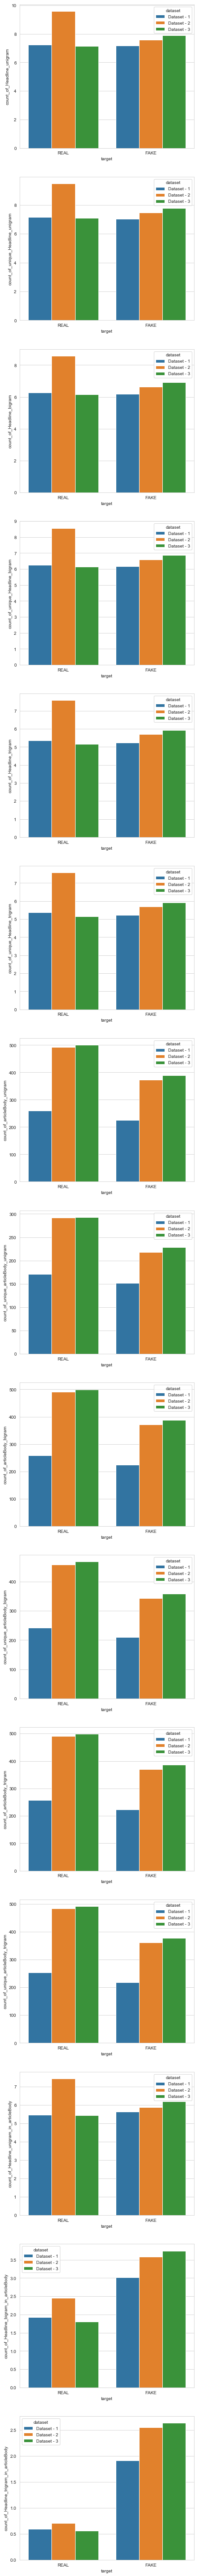

In [36]:
# Counts plots
fig, axs = plt.subplots(nrows = len(countss), figsize = (7,7*len(countss)))
for i in range(len(countss)):
    sns.barplot(x= 'target', y = countss[i], data = cf_c, hue = 'dataset', ci = False, ax= axs[i])
    

In [37]:
#fig.savefig(save_plot+'7_count_features',dpi = 300)

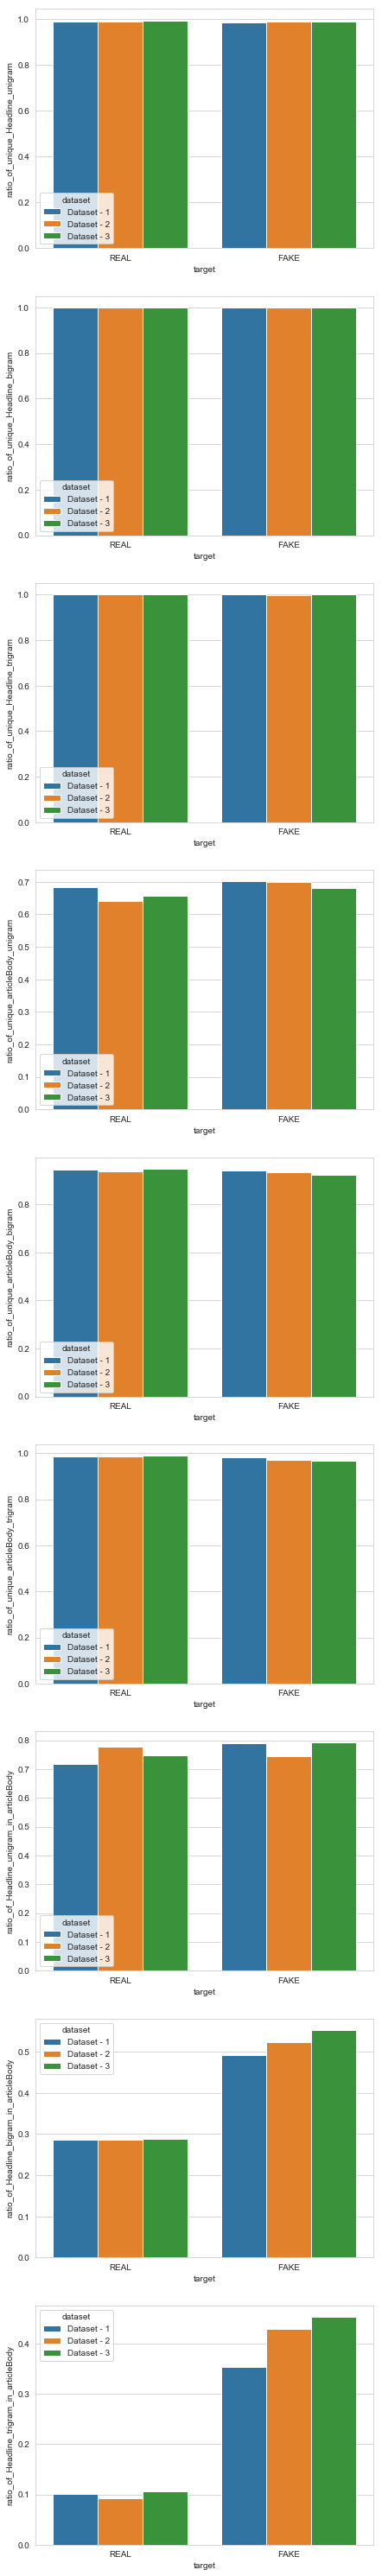

In [38]:
fig, axs = plt.subplots(nrows = len(ratioss), figsize = (7,6*len(ratioss)))
for i in range(len(ratioss)):
    sns.barplot(x = 'target', y = ratioss[i], data = cf_c, hue = 'dataset', ci = False, ax = axs[i])

In [40]:
fig.savefig(save_plot+'8_count_features_ratios',dpi = 300)

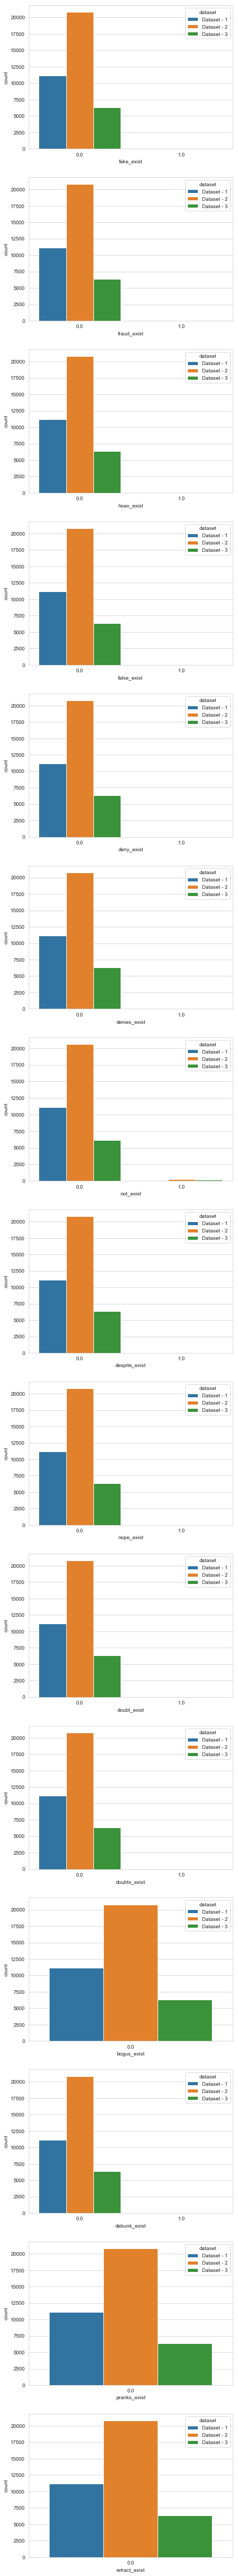

In [42]:
fig, axs = plt.subplots(nrows = len(existss), figsize = (7,6*len(existss)))
for i in range(len(existss)):
    sns.countplot(x = existss[i], data = cf_c, hue = 'dataset', ax = axs[i])

In [43]:
fig.savefig(save_plot+'9_count_features_exists',dpi = 300)

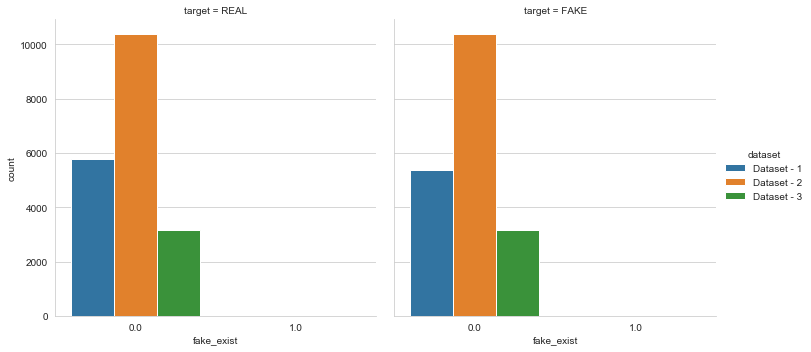

In [19]:
sns.catplot(x = existss[0], data = cf_c, hue='dataset', col = 'target', kind = "count")